#### Optimization algorithms with default recommended parameters, additionaly each algorithm has an option to include interactions between variables
1. IWLS
2. SGD
3. ADAM

In [1]:
from logisticRegression import LogisticRegression, Optimizer
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
def addInteractions(X):
    newX=X
    for i in range(X.shape[1]):
        for j in range(i+1,X.shape[1]):
            newX=np.c_[newX,np.multiply(X[:,i],X[:,j])]
    return newX

Converged after 15 iterations


0.2672064777327935

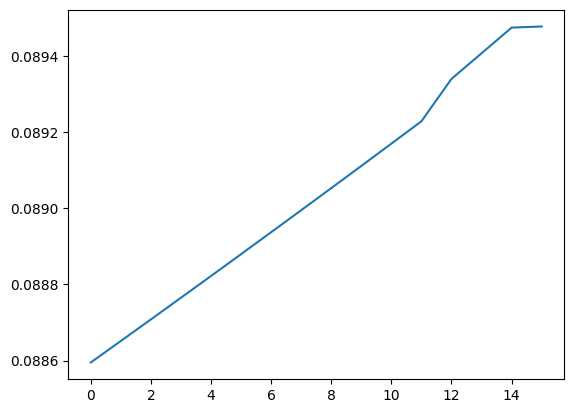

In [3]:
logisticRegressor=LogisticRegression(noOfIterations=500, learningRate=0.001, optimizer=Optimizer.SGD)
raw_data = loadarff("./Datasets/blood-transfusion-service-center.arff")
df_data = pd.DataFrame(raw_data[0])
df_no_class=df_data.drop('Class',axis=1)
X = df_no_class.to_numpy()

X=X/100000
y = df_data['Class'].to_numpy()
y[y==b'2']=1
y[y==b'1']=0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
costs = logisticRegressor.fit(X_train.astype(float),y_train.astype(float))
y_pred=logisticRegressor.predict(X_test)

sns.lineplot(costs)
1-np.sum(np.abs(y_pred-y_test))/len(y_test)



In [4]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train.astype(float),y_train.astype(float))
y_pred=clf.predict(X_test)
1-np.sum(np.abs(y_pred-y_test))/len(y_test)

0.7327935222672064